<a href="https://colab.research.google.com/github/KevOdhiambo/Unsupervised-Learning-With-R/blob/main/Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
#Install Necessary Libaries 
install.packages('tidyverse')
install.packages('factoextra')
install.packages('FactoMineR')



(as ‘lib’ is unspecified)







	‘/tmp/RtmpSECk0E/downloaded_packages’

(as ‘lib’ is unspecified)












































































































































































































	‘/tmp/RtmpSECk0E/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpSECk0E/downloaded_packages’



In [ ]:
%%R
#load the neccesary libraries
library(tidyverse)
library(factoextra)
library(FactoMineR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
%%R
#load and preveiw the Sales Dataset
sales<-read.csv('SalesData.csv')

In [ ]:
%%R
#preview our dataset
head(sales, 5)

   Invoice.ID Branch Customer.type Gender           Product.line Unit.price
1 750-67-8428      A        Member Female      Health and beauty      74.69
2 226-31-3081      C        Normal Female Electronic accessories      15.28
3 631-41-3108      A        Normal   Male     Home and lifestyle      46.33
4 123-19-1176      A        Member   Male      Health and beauty      58.22
5 373-73-7910      A        Normal   Male      Sports and travel      86.31
  Quantity     Tax      Date  Time     Payment   cogs gross.margin.percentage
1        7 26.1415  1/5/2019 13:08     Ewallet 522.83                4.761905
2        5  3.8200  3/8/2019 10:29        Cash  76.40                4.761905
3        7 16.2155  3/3/2019 13:23 Credit card 324.31                4.761905
4        8 23.2880 1/27/2019 20:33     Ewallet 465.76                4.761905
5        7 30.2085  2/8/2019 10:37     Ewallet 604.17                4.761905
  gross.income Rating    Total
1      26.1415    9.1 548.9715
2       3.8200

In [ ]:
%%R
# Identify uniue entries in the Gross Margin Percentage Column
unique(sales$gross.margin.percentage)

[1] 4.761905


In [ ]:
%%R
# Set gross margin percentage column
sales$gross.margin.percentage <- NULL

In [ ]:
%%R
str(sales)

'data.frame':	1000 obs. of  15 variables:
 $ Invoice.ID   : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch       : chr  "A" "C" "A" "A" ...
 $ Customer.type: chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender       : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax          : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date         : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time         : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment      : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...


In [ ]:
%%R
# is the Tax column entrie same to gross income?
all(sales$Tax == sales$gross.income)

#from the results yes, they are. hence i'll set eiter of them to null

[1] TRUE


In [ ]:
%%R
# Set gross income to null
sales$gross.income <- NULL

In [ ]:
%%R
# check the summary stats excluding the ID, Date and Time columns
summary(sales[, -c(1,9,10)])

    Branch          Customer.type         Gender          Product.line      
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   Unit.price       Quantity          Tax            Payment         
 Min.   :10.08   Min.   : 1.00   Min.   : 0.5085   Length:1000       
 1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249   Class :character  
 Median :55.23   Median : 5.00   Median :12.0880   Mode  :character  
 Mean   :55.67   Mean   : 5.51   Mean   :15.3794                     
 3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453                     
 Max.   :99.96   Max.   :10.00   Max.   :

In [ ]:
%%R
# Rearrange columns in the dataset
sales2 <- sales[, c(2,3,4,5,11,6,7,8,12,14,13)]
row.names(sales2) <- sales$Invoice.ID

In [ ]:
%%R
# Perform PCA on qualitative variables
pca <- prcomp(sales2[, c(6:10)], scale = TRUE)

In [ ]:
%%R
#check our PCA summary
summary(pca)

Importance of components:
                          PC1    PC2     PC3       PC4       PC5
Standard deviation     1.9814 0.9946 0.29132 1.813e-16 1.056e-16
Proportion of Variance 0.7852 0.1979 0.01697 0.000e+00 0.000e+00
Cumulative Proportion  0.7852 0.9830 1.00000 1.000e+00 1.000e+00


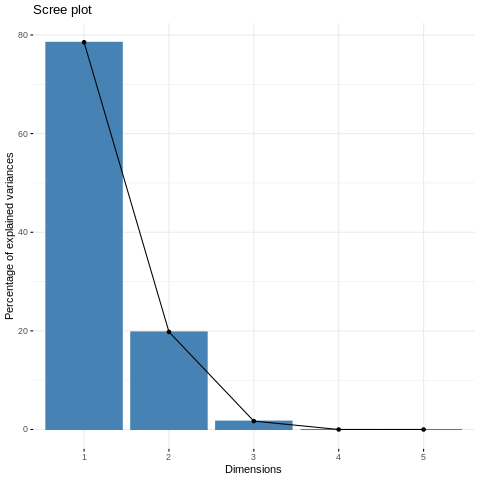

In [ ]:
%%R
# visualize the variance for each component from the PCA

fviz_eig(pca)

#The first principal component(PC1) explains over 75% variation from our Sales dataset.

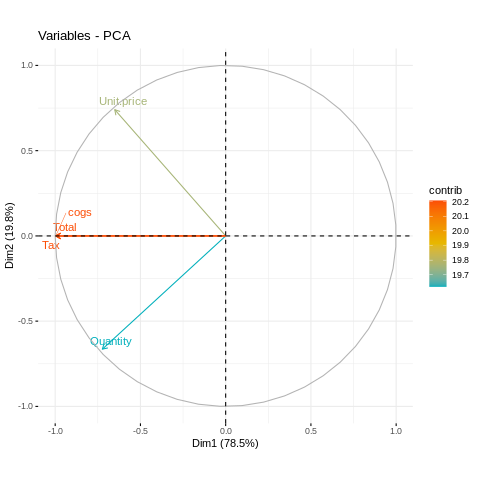

In [ ]:
%%R
#Plot the PCA Variances
fviz_pca_var(pca,
             col.var ="contrib", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

#1. Total variable is a combination of tax and cogs variables. 
#2. A large number of variables in the data are categorical.
#3. factor analysis on mixed data for these variables could be helpful.

In [ ]:
%%R
# Perform factor analysis
famd <- FAMD(sales2,ncp = 7, graph = F)

In [ ]:
%%R
# get the eigen values for each dimension
get_eigenvalue(famd)

      eigenvalue variance.percent cumulative.variance.percent
Dim.1   3.935724        23.151318                    23.15132
Dim.2   1.174640         6.909645                    30.06096
Dim.3   1.115268         6.560402                    36.62137
Dim.4   1.098977         6.464571                    43.08594
Dim.5   1.089241         6.407302                    49.49324
Dim.6   1.053089         6.194643                    55.68788
Dim.7   1.023004         6.017669                    61.70555


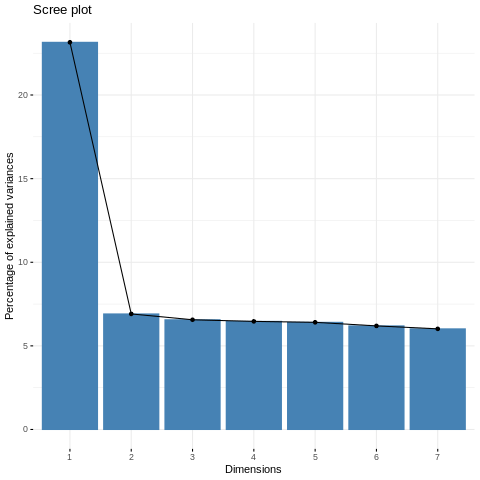

In [ ]:
%%R
#plot our fndings
fviz_eig(famd)

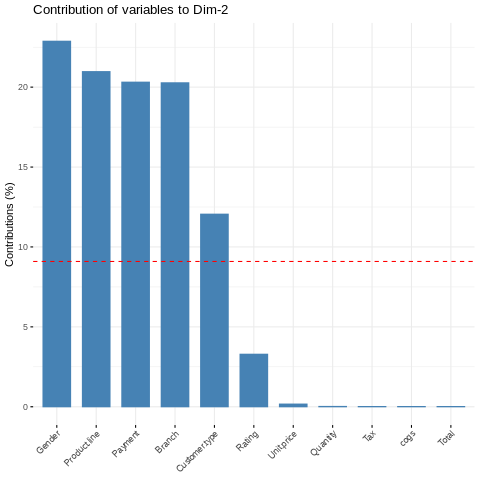

In [ ]:
%%R
# Plot of variables
fviz_famd_var(famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(famd, "var", axes = 2)

In [ ]:
#From the plots above, it can be seen that:

#- variables that contribute the most to the first dimension are: tax, cogs and total

#- variables that contribute the most to the second dimension are: gender, product line, payment